# Vizualizacija podatkov

Vizualizacija podatkov je faza analize podatkov, kjer poskrbimo za grafično ponazoritev tabelaričnih podatkov. Osnovno orodje pri vizualizaciji je **statistični diagram**. Slednji je preslikava spremenljivk podatkovne tabele v estetske lastnosti geometrijskih objektov. Tako, na primer, *razsevni diagram* preslika vrednosti numeričnih spremenljivk $X$ in $Y$ v pozicije (estetske lastnosti) točk (geometrijske objekte): vrednost spremenljivke $X$ preslika v horizontalno pozicijo (na osi $x$), $Y$ pa v vertikalno pozicijo (na osi $y$ diagrama). Primeri geometrijskih objektov, ki jih pogosto uporabljamo v diagramih, so točka, črta ali pravokotnik. Estetske lastnosti točke so njena (horizontalna in vertikalna) pozicija ali lega, velikost, oblika in barva.

Običajni pristop k sestavljanju statističnih diagramov predvideva izbor oblike diagrama iz neke knjižnice možnih oblik in njihovo povezovanje s spremenljivkami podatkovne množice. Tak pristop uporabljajo programi za delo s preglednicami, kot sta, na primer, _MS Excel_ ali _Google Sheets_.

Python-ovska knjižnica `plotnine` uporablja drugačen pristop, ki sloni na **slovnici statističnih diagramov** definirani v članku [(Wickham 2010)](https://doi.org/10.1198/jcgs.2009.07098). Slovnica določa množico **osnovnih sestavnih elementov diagramov**, ki jih lahko sami sestavljamo v statistične diagrame. Slovnica tako omogoča, da presežemo specifiko vnaprej pripravljenih diagramov (npr. zgoraj omenjeni razsevni diagram za dve numerični spremenljivki v programu za delo s preglednicami) z bolj splošnimi elementi za sestavljanje statističnih diagramov poljubne oblike. Slovnico implementira knjižnica [`ggplot2`](https://ggplot2.tidyverse.org/) v R-ju: knjižnica `plotnine` implementira funkcionalnosti `ggplot2` in slovnice statističnih diagramov v Python-u. Ker je `ggplot2` daleč bolj znana in popularna knjižnica, boste veliko lažje našli ustrezne informacije, če pri iskanju uporabljate ključno besedo `ggplot2` namesto `plotnine`.

V podpoglavjih spodaj bomo spoznali elemente slovnice statističnih diagramov na konkretnih primerih. Python-ovska knjižnica `plotnine` nam omogoča enostavno in postopno sestavljanje elementov z (neobičajno) uporabo operatorja `+`. Ker je vsak element definiran v svojem razdelku klica funkcije, ločenem z operatorjem `+`, lahko vsak element oblikujemo neodvisno od ostalih in (obliko) diagram(a) razvijamo po korakih. Pred nadaljevanjem pripravimo knjižnice in podatke za vizualizacijo, t.j., rezultate študentov na kolokvijih:

In [1]:
import pandas as pd
import plotnine as p9

studenti = pd.read_csv("https://kt.ijs.si/~ljupco/lectures/papvp-2324/studenti.csv")
studenti_ocene = pd.read_csv("https://kt.ijs.si/~ljupco/lectures/papvp-2324/studenti_ocene.csv")

print(f"studenti =\n{studenti}\n\nstudenti_ocene =\n{studenti_ocene}")

studenti =
      ime  telefon spol  starost
0     Ana      431    ž       19
1  Branko      720    m       20
2  Cvetka      761    ž       21
3   David      141    m       19
4     Eva      210    ž       20
5   Franc      592    m       21

studenti_ocene =
       ime  semester  kolokvij  rezultat
0      Ana         1         1      80.0
1      Ana         1         2      82.0
2      Ana         2         1      97.0
3      Ana         2         2      95.0
4   Branko         1         1      78.0
5   Branko         1         2       NaN
6   Branko         2         1      74.0
7   Branko         2         2       NaN
8   Cvetka         1         1       NaN
9   Cvetka         1         2      63.0
10  Cvetka         2         1       NaN
11  Cvetka         2         2      87.0
12   David         1         1      75.0
13   David         1         2      92.0
14   David         2         1      68.0
15   David         2         2      81.0
16     Eva         1         1      63.0
17

Elemente statističnih diagramov bomo sproti ilustrirali na vizualizacijah podatkov iz teh tabel.

## Podatkovna tabela `data`, estetska preslikava spremenljivke `aes` in geometrijski objekt `geom`

Podatke za vizualizacijo običajno uredimo v podatkovno tabelo formata *tidy data*. **Podatkovna tabela** je seveda ključni element diagrama, a še enkrat je treba spomniti na neodvisnost elementov v slovnici statističnih diagramov. Strukturo diagrama, ki smo jo pripravili za eno podatkovno tabelo in vsebuje tudi vse druge potrebne elemente slovnice, lahko brez omejitev (a le če je smiselno) uporabimo na različnih, tudi drugih podatkovnih tabelah.

Drugi pomemben element slovnice je **estetska preslikava** (angl. *aesthetic mapping*), ki vzpostavi povezavo med izbrano spremenljivko `X` podatkovne tabele in izbrano estetsko lastnostjo `e`. Bolj formalno, je preslikava $f_{e}: D_X \to D_e$, kjer je $D_X$ domena (množica možnih) vrednosti spremenljivke $X$, $D_e$ pa domena vrednosti estetske lastnosti $e$. Najbolj pogosto uporabljane estetske lastnosti so

- `x` in `y` z domenami $D_\mathtt{x}, D_\mathtt{y} \subseteq \mathbb{R}$ določata pozicijo (lego) geometrijskega objekta, ki ponazori vrednost spremenljivke $X$ na x-osi oziroma y-osi statističnega diagrama;

- `shape` določi obliko objekta, $D_\mathtt{shape}$ je množica možnih oblik;

- `size` določi velikost objekta, $D_\mathtt{size} \subseteq \mathbb{R}^{+}$;

- `color` oziroma `fill` določi barvo roba in notranjosti objekta, $D_\mathtt{color} = D_\texttt{fill}$ je množica možnih barv.

Za uporabo teh dveh elementov slovnice poskusimo narisati diagram, kjer bodo na x-osi imena študentov, na $y$ osi pa njihovi rezultati na kolokvijih:

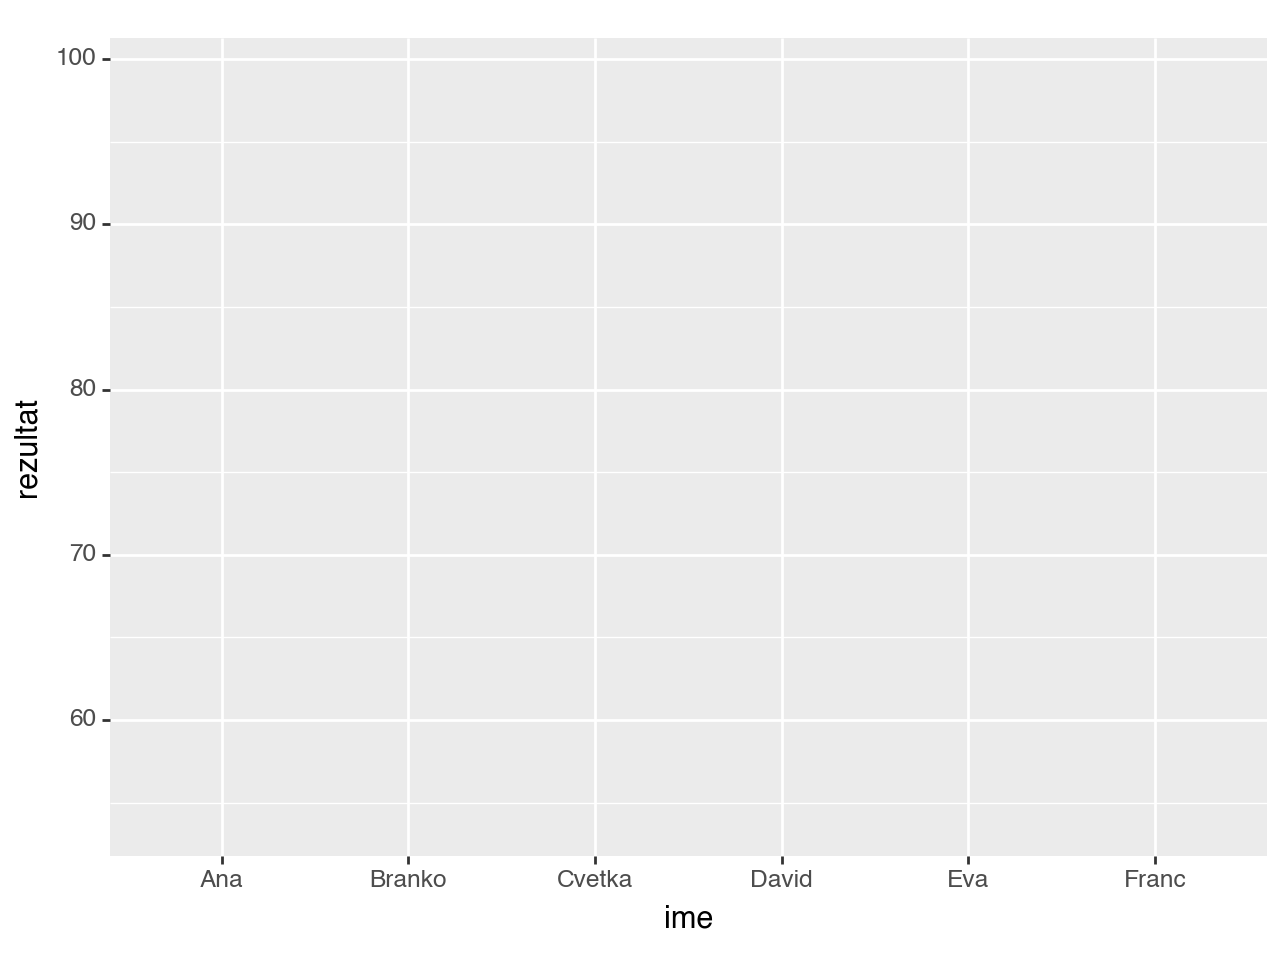

<Figure Size: (640 x 480)>

In [2]:
(
  p9.ggplot(data = studenti_ocene) +
  p9.aes(x = "ime", y = "rezultat")
)

Uporabili smo dve funkciji knjižnice `plotnine`. V klicu funkcije `ggplot` smo določili prvi element slovnice, podatkovno tabelo `data`. S klicem funkcije `aes` smo določili drugi element slovnice, estetski preslikavi za spremenljivki `ime` (pozicija `x`) in `rezultat` (pozicija `y`).

### Geometrijski objekt točka

A diagram je prazen. Zato, ker nismo določili tretje komponente slovnice, **geometrijski objekt** `geom`. To storimo s klicem tretje funkcije `geom_point`, ki določi, da je vsak rezultat študentov ponazorjen s točko:

/Users/ljupco/predmeti/pandas/venv/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


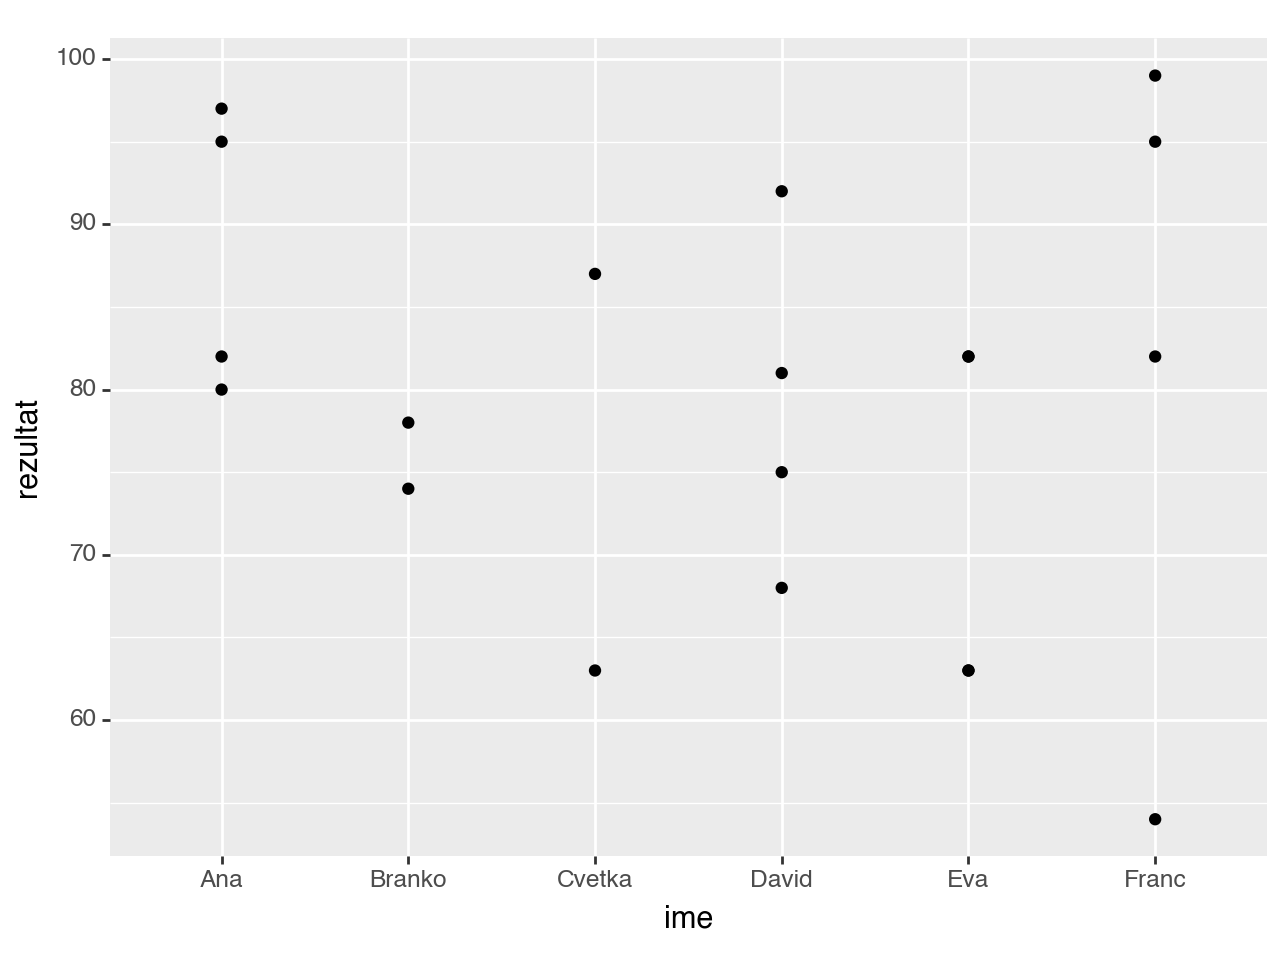

<Figure Size: (640 x 480)>

In [3]:
(
  p9.ggplot(data = studenti_ocene) +
  p9.aes(x = "ime", y = "rezultat") +
  p9.geom_point()
)

Pri izbiri geometrijskega objekta maramo upoštevati razpoložljiv nabor njegovih estetskih lastnosti. Estetske lastnosti točke lahko dobimo z vpogledom v dokumentacijo funkcije `geom_point` (spomnimo se, lahko poiščemo pomoč za ustrezno funkcijo knjižnice `ggplot2`). Poglejmo celoten seznam estetskih lastnosti geometrijskega objekta točka:

- `x`, `y`, `shape`, `size`, `color` in `fill` smo že spoznali;

- `alpha` določa *stopnjo prozornosti* barve objekta (vrednost je med 0 in 1), nižje vrednosti povečujejo prozornost;

- `storke` določa debelino črte, ki ponazori rob objekta (točke).

Poglejmo dodatne primere uporabe estetskih lastnosti:

/Users/ljupco/predmeti/pandas/venv/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


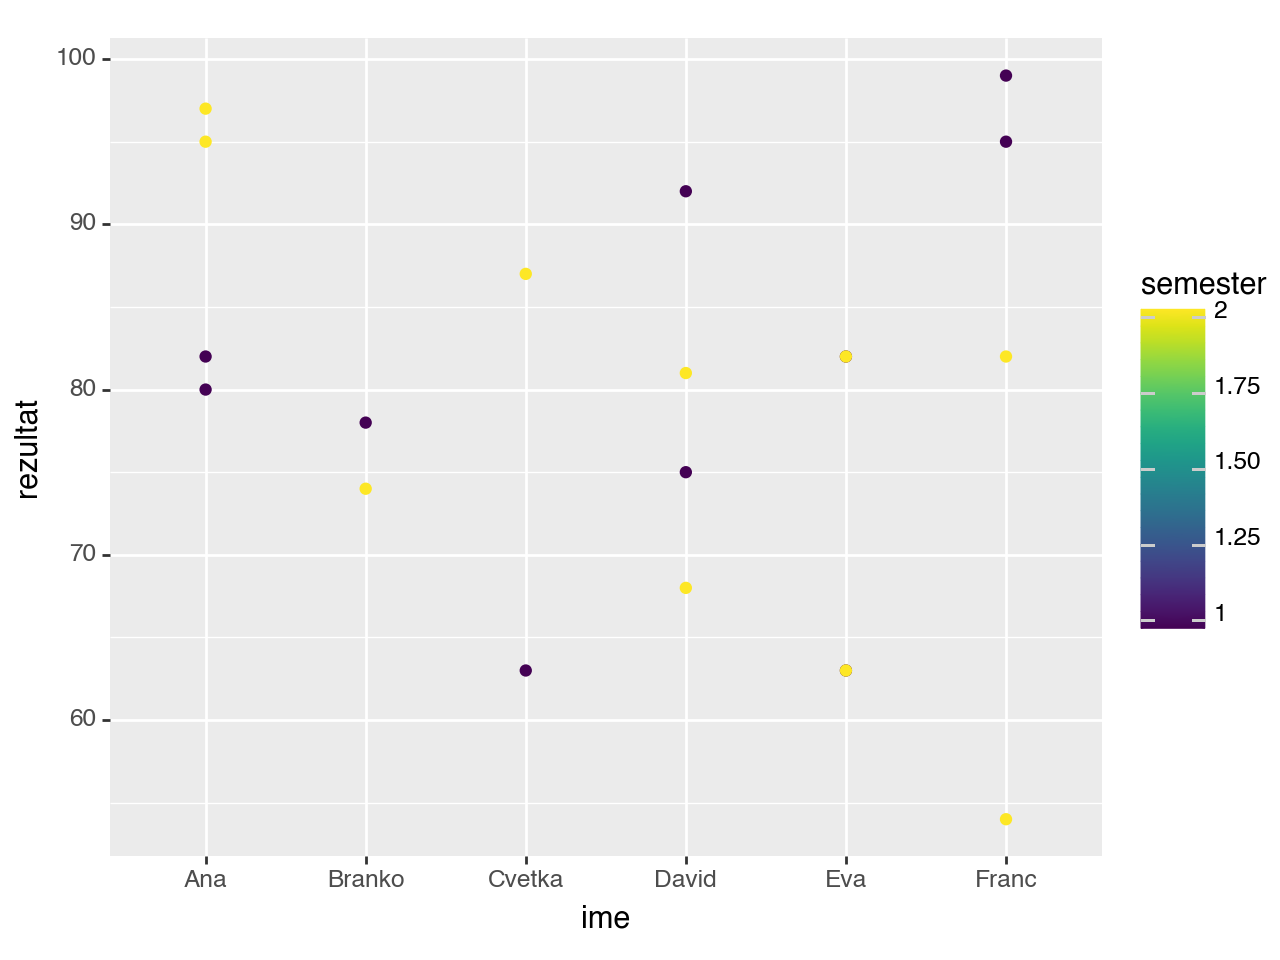

<Figure Size: (640 x 480)>

In [4]:
(
  p9.ggplot(data = studenti_ocene) +
  p9.aes(
    x = "ime",
    y = "rezultat",
    color = "semester"
  ) +
  p9.geom_point()
)

Poglejmo estetsko preslikavo za barvo, ki jo ponazori lestvica na desni strani diagrama. Vidimo, da je lestvica pripravljena za katerokoli vrednost spremenljivke `semester` na intervalu $[1,2]$. To je zato, ker je spremenljivka `semester` numeričnega tipa. Če tip te spremenljivke spremenimo v faktor, bi dobili boljši (in bolj ustrezen, pa tudi bolj pravilen) diagram:

/Users/ljupco/predmeti/pandas/venv/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


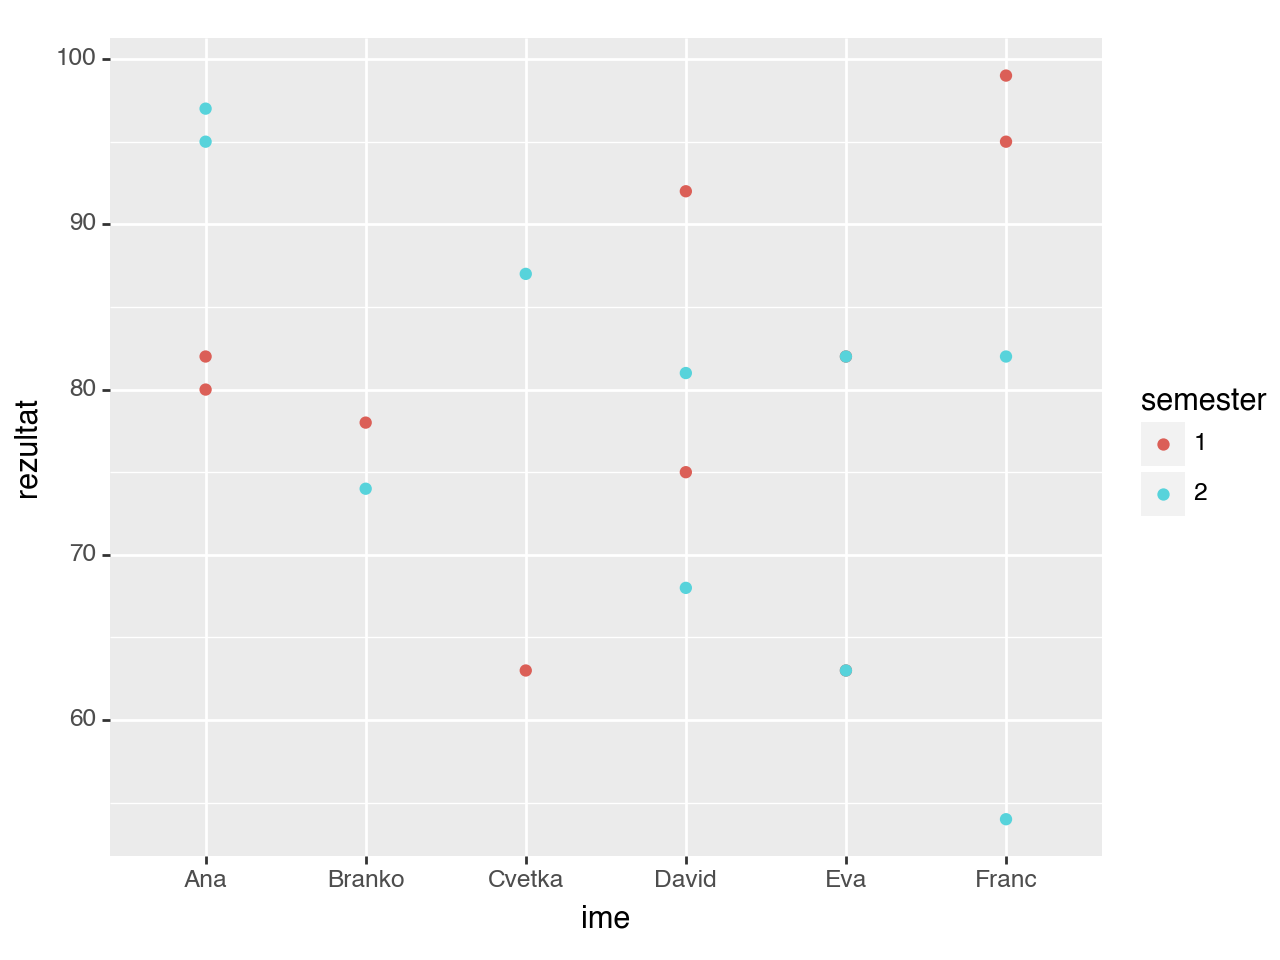

<Figure Size: (640 x 480)>

In [5]:
studenti_ocene.semester = studenti_ocene.semester.astype('category')
(
  p9.ggplot(data = studenti_ocene) +
  p9.aes(
    x = "ime",
    y = "rezultat",
    color = "semester"
  ) +
  p9.geom_point()
)

Estetska preslikava torej preslika diskretno spremenljivko $X$ v končno množico barv $D_\texttt{color}$ za katero velja $|D_\texttt{color}| = |D_X|$.

V estetsko lastnost oblike lahko preslikamo zgolj diskretne spremenljivke, zato bomo poskrbeli še za pretvorbo tipa spremenljivke `kolokvij`:

/Users/ljupco/predmeti/pandas/venv/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


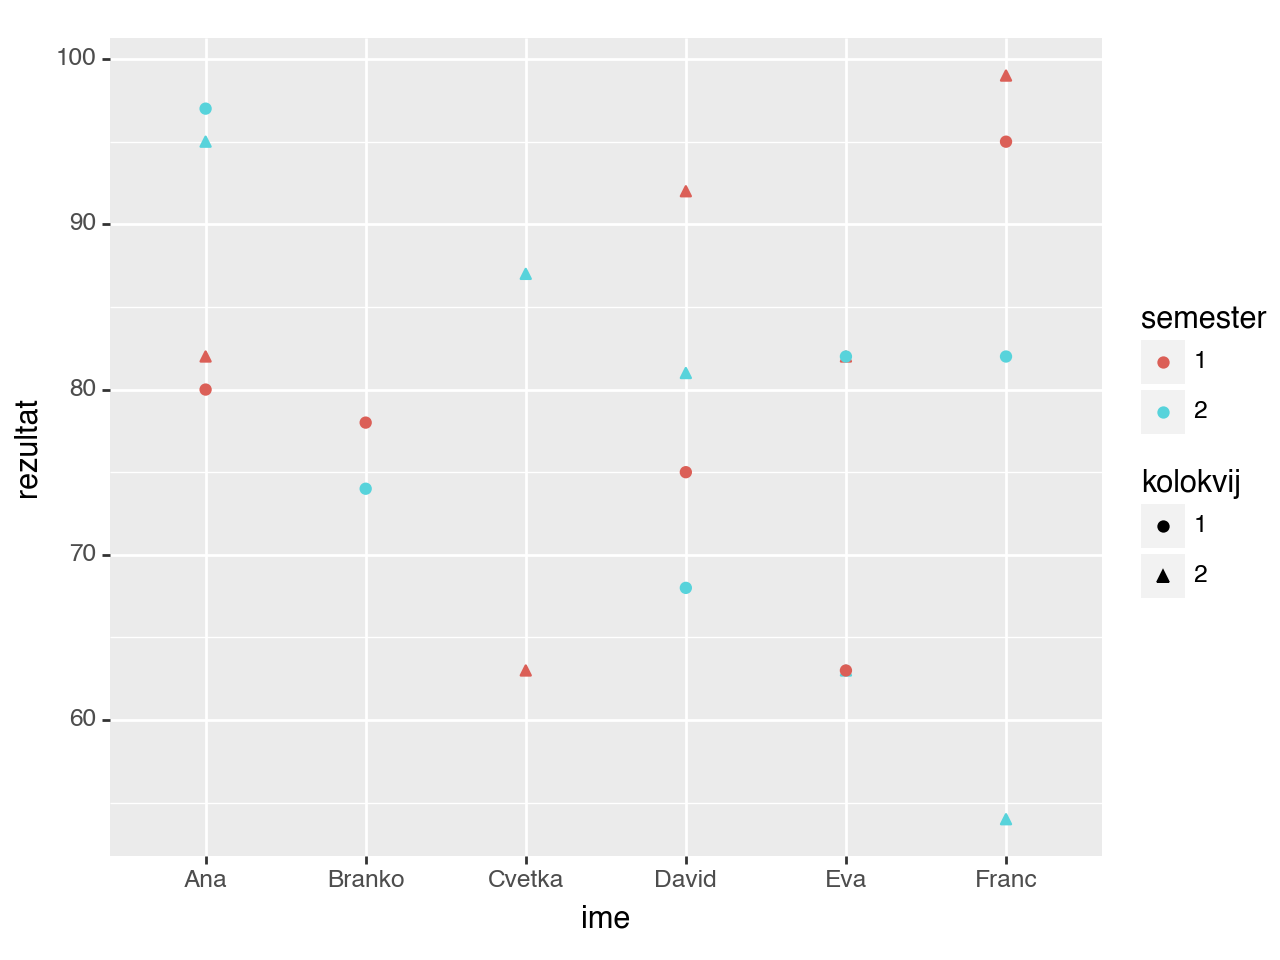

<Figure Size: (640 x 480)>

In [6]:
studenti_ocene.kolokvij = studenti_ocene.kolokvij.astype('category')
(
  p9.ggplot(data = studenti_ocene) + 
  p9.aes(
    x = "ime",
    y = "rezultat",
    color = "semester",
    shape = "kolokvij"
  ) +
  p9.geom_point()
)

Poskrbimo zdaj za velikost točk na diagramu: denimo, da želimo povečati vse točke na diagramu, ne glede na to, katere podatke ponazorijo. Torej zdaj ne gre za definiranje estetske preslikave (med podatki in estetsko lastnostjo), temveč rabimo zgolj _nastavljanje estetske lastnosti_ geometrijskih objektov. Slednje opravimo znotraj klica funkcije `geom_point` takole:

/Users/ljupco/predmeti/pandas/venv/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


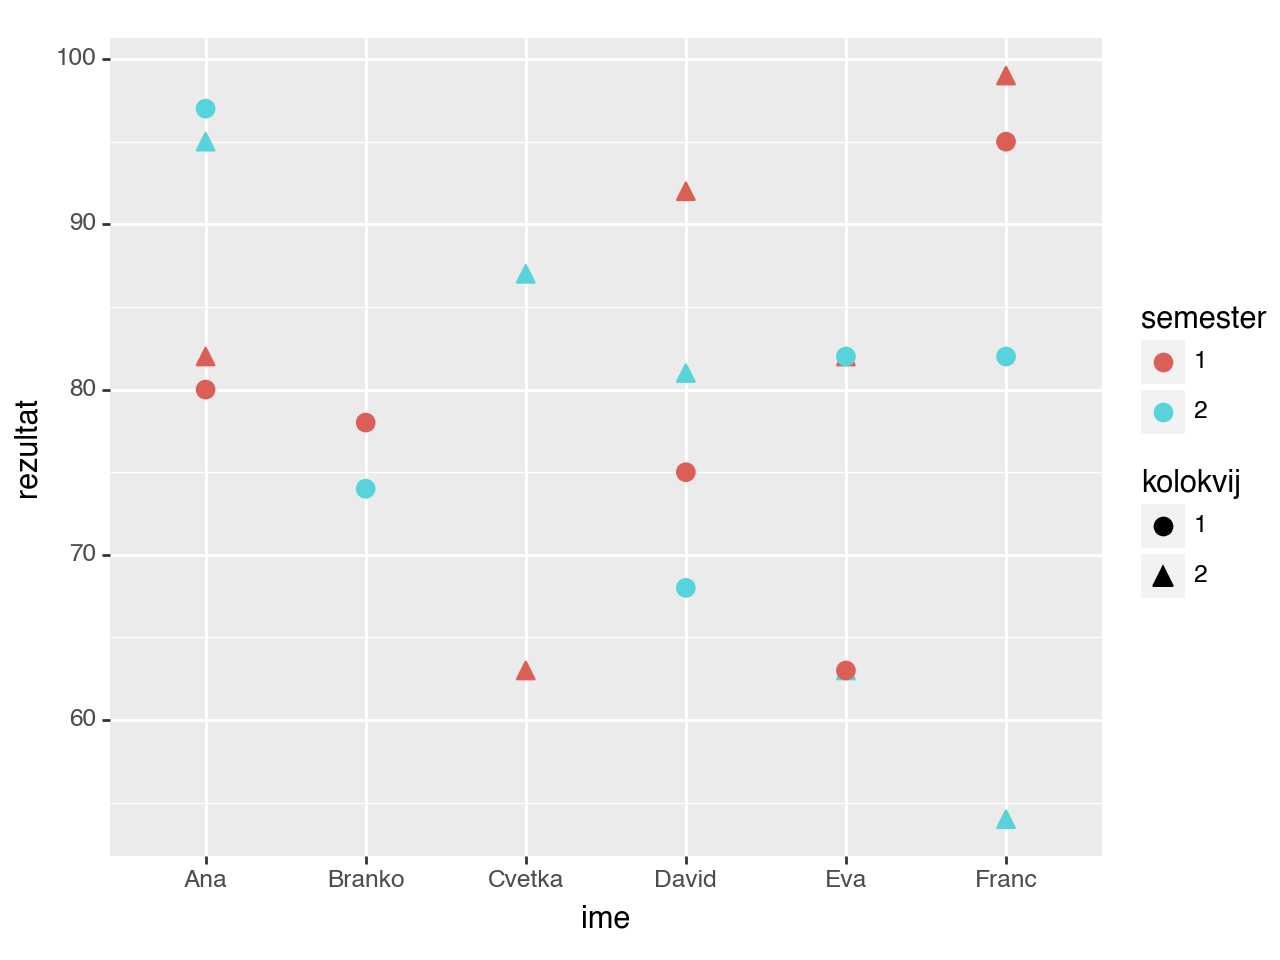

<Figure Size: (640 x 480)>

In [7]:
(
  p9.ggplot(data = studenti_ocene) + 
  p9.aes(
    x = "ime",
    y = "rezultat",
    color = "semester",
    shape = "kolokvij"
  ) +
  p9.geom_point(size = 3)
)

Za zaporedni številki semestra in kolokvija smo uporabili dve estetski lastnosti, kar se zdi potratno, glede na to, da gre za štiri zaporedne kolokvije. Namesto dveh oblik in dveh barv, bi lahko uporabili štiri barve. Zato, da to dosežemo, moramo izračunati novo spremenljivko, ki bo združevala semester in kolokvij. Na primer takole:

/Users/ljupco/predmeti/pandas/venv/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


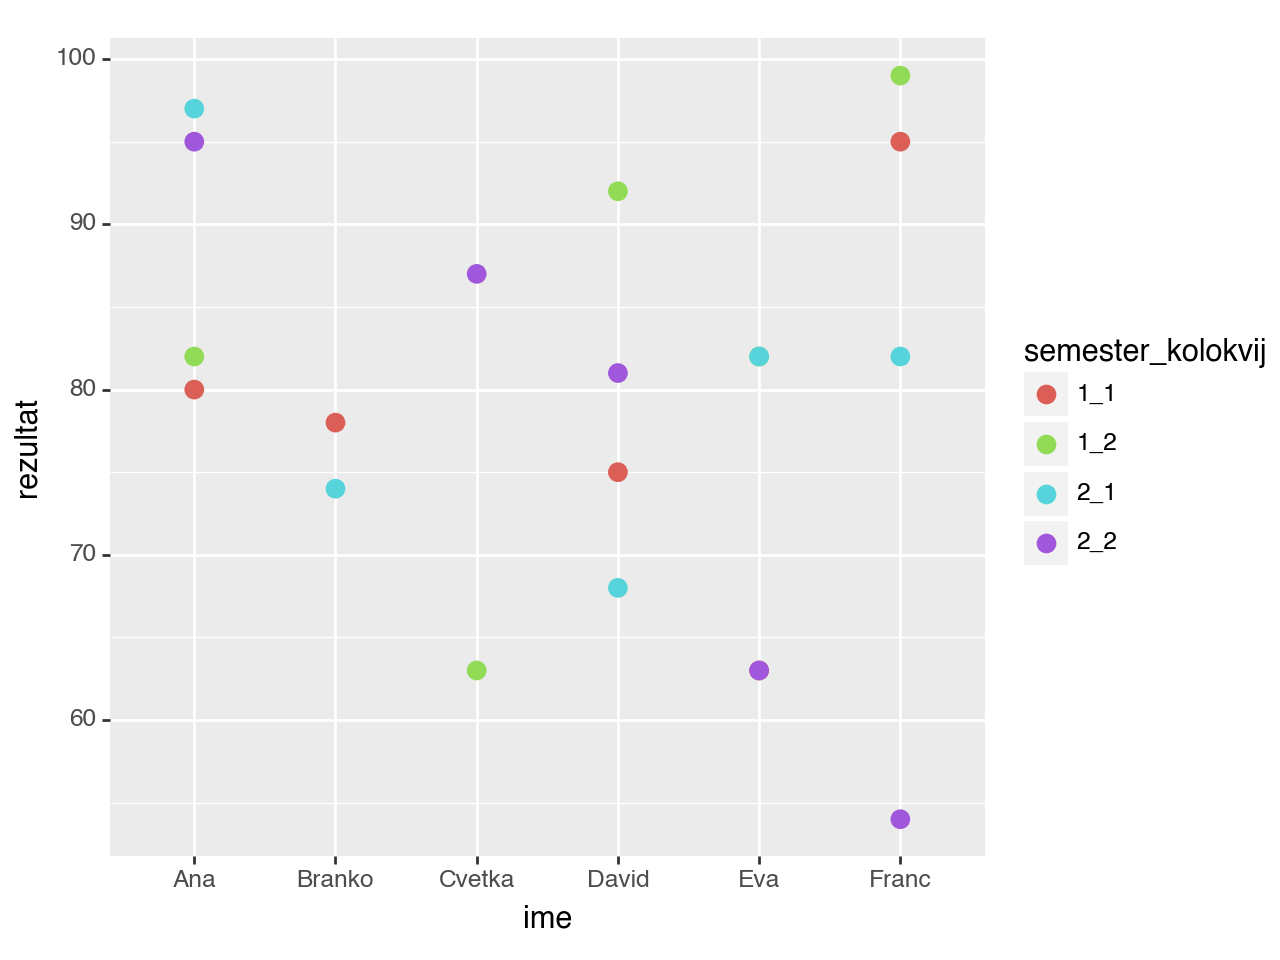

<Figure Size: (640 x 480)>

In [13]:
studenti_ocene["semester_kolokvij"] = pd.Series(
  studenti_ocene.semester.astype(str) + "_" + studenti_ocene.kolokvij.astype("str"),
  dtype = "category"
)
(
  p9.ggplot(data = studenti_ocene) + 
  p9.aes(
    x = "ime",
    y = "rezultat",
    color = "semester_kolokvij"
  ) +
  p9.geom_point(size = 3)
)

### Geometrijski objekt stolpec

Poskusimo zdaj zamenjati geometrijski objekt iz točke v pravokotnik, ki ga v `plotnine` imenujemo stolpec, po angleško `col` od _column_:

/Users/ljupco/predmeti/pandas/venv/lib/python3.11/site-packages/plotnine/layer.py:344: PlotnineWarning: position_stack : Removed 4 rows containing missing values.


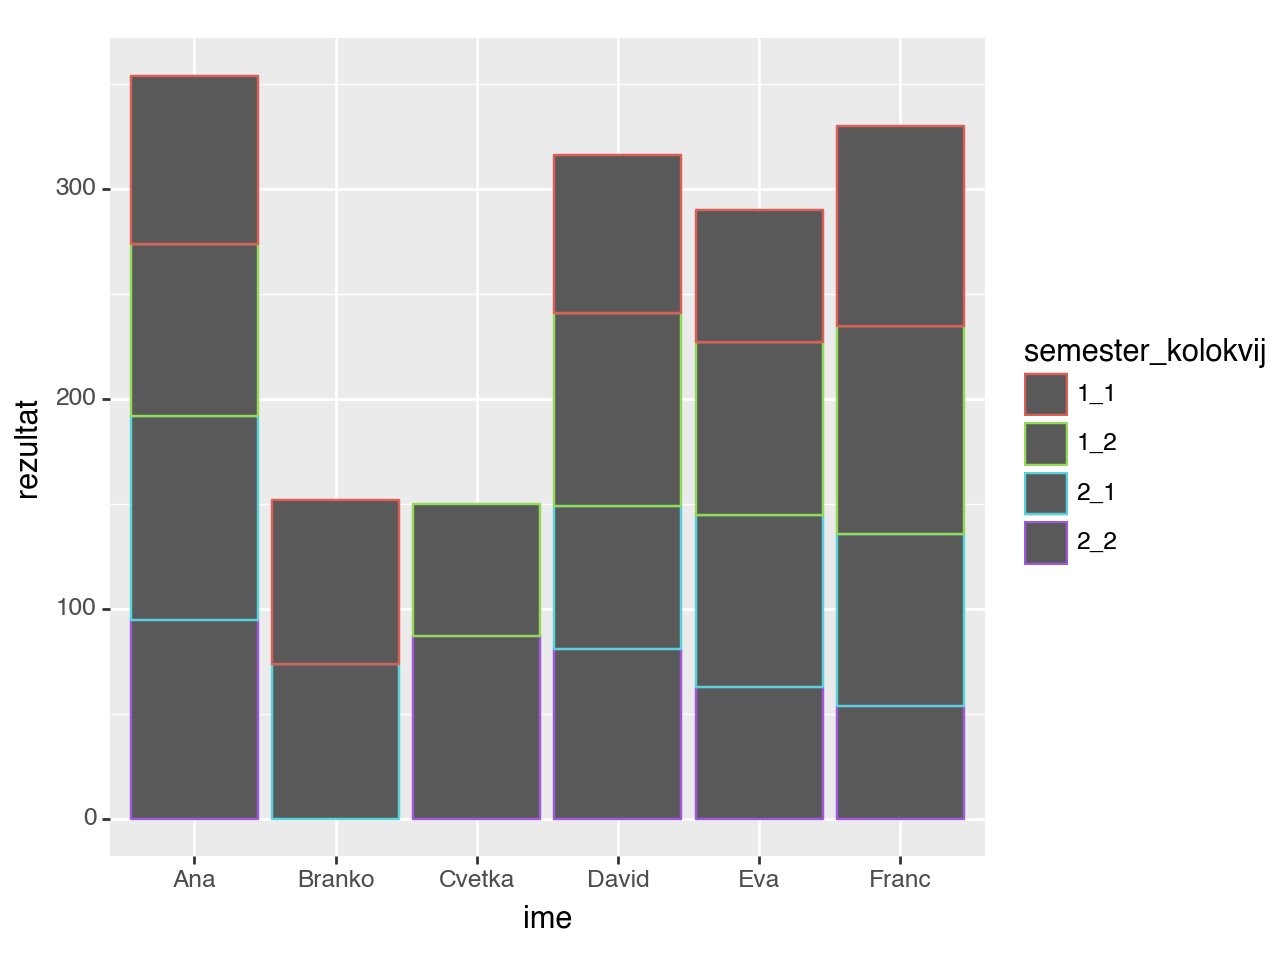

<Figure Size: (640 x 480)>

In [9]:
(
  p9.ggplot(data = studenti_ocene) + 
  p9.aes(
    x = "ime",
    y = "rezultat",
    color = "semester_kolokvij"
  ) +
  p9.geom_col()
)

Spomnimo se, da `color` določa le barvo **roba** geometrijskega objekta. Če hočemo spreminjati tudi barvo **notranjosti** objekta, uporabiti moramo estetsko lastnost `fill`:

/Users/ljupco/predmeti/pandas/venv/lib/python3.11/site-packages/plotnine/layer.py:344: PlotnineWarning: position_stack : Removed 4 rows containing missing values.


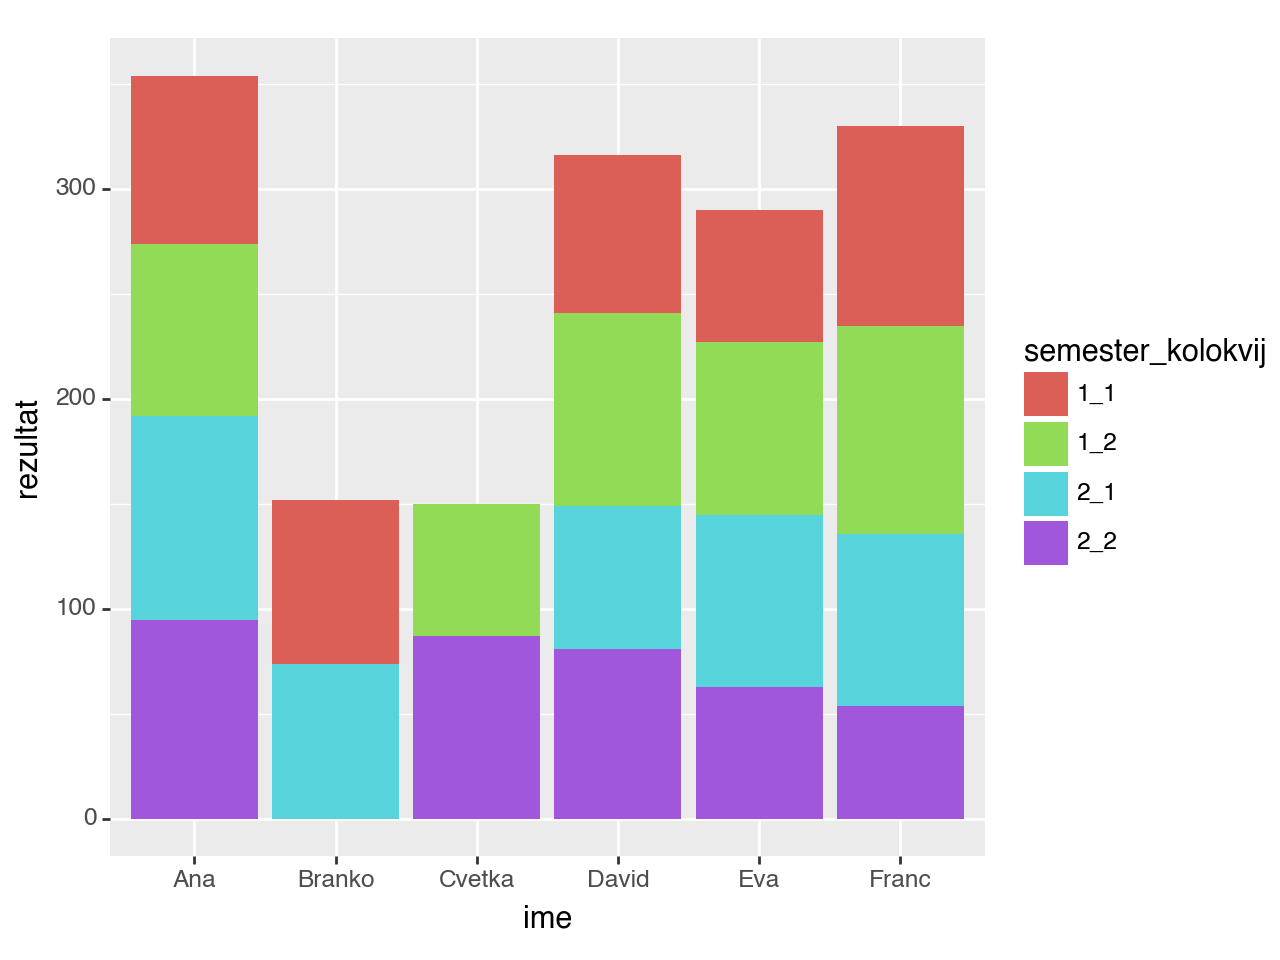

<Figure Size: (640 x 480)>

In [10]:
(
  p9.ggplot(data = studenti_ocene) + 
  p9.aes(
    x = "ime",
    y = "rezultat",
    fill = "semester_kolokvij"
  ) +
  p9.geom_col()
)

Na diagramu lahko opazimo nenavadno razporeditev kolokvijev: prvi kolokvij v prvem semestru je na vrhu stolpcev, zadnji kolokvij (drugi v drugem semestru) je pa na dnu. Ta razporeditev ni naravne, za vrednosti v stolpcih diagrama pričakujemo, da so razporejene v vrstnem redu od spodaj navzgor. Pričakovali bi, torej, da so rezultati prvega kolokvija v prvem semestru na dnu stolpcev. Razpored kolokvijev je posledica vrstnega reda kategorij spremenljivke `semester_kolokvij`:

In [11]:
kategorije = studenti_ocene.semester_kolokvij.cat.categories.to_list()
print(kategorije)

['1_1', '1_2', '2_1', '2_2']


/Users/ljupco/predmeti/pandas/venv/lib/python3.11/site-packages/plotnine/layer.py:344: PlotnineWarning: position_stack : Removed 4 rows containing missing values.


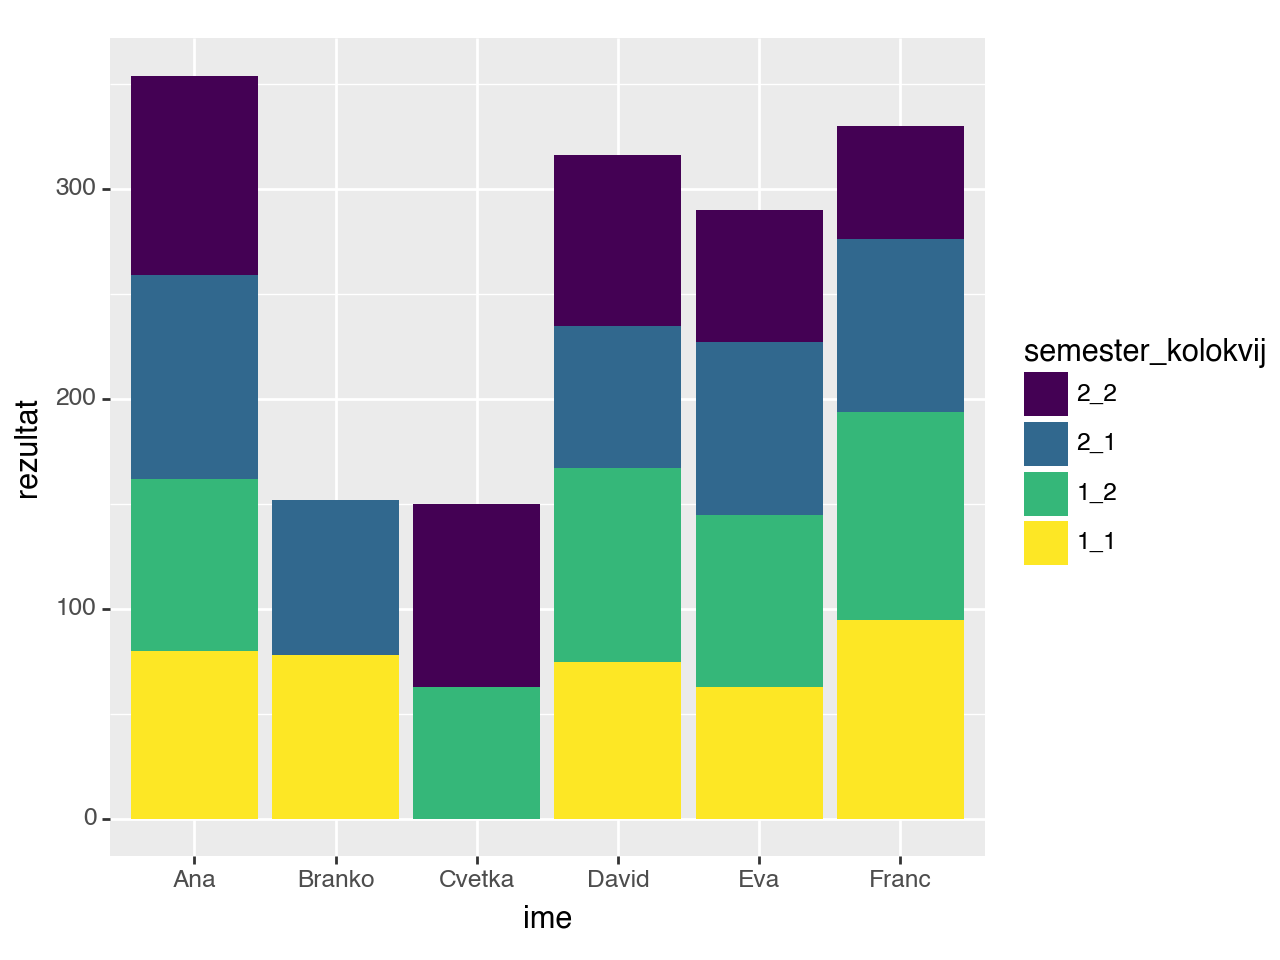

<Figure Size: (640 x 480)>

In [12]:
kategorije.reverse()
studenti_ocene.semester_kolokvij = studenti_ocene.semester_kolokvij.cat.reorder_categories(
  new_categories = kategorije, ordered = True
)
(
  p9.ggplot(data = studenti_ocene) + 
  p9.aes(
    x = "ime",
    y = "rezultat",
    fill = "semester_kolokvij"
  ) +
  p9.geom_col()
)

### Geometrijski objekt črta

Poskusimo še en osnovni geometrijski objekt, črto s funkcijo `geom_line`:

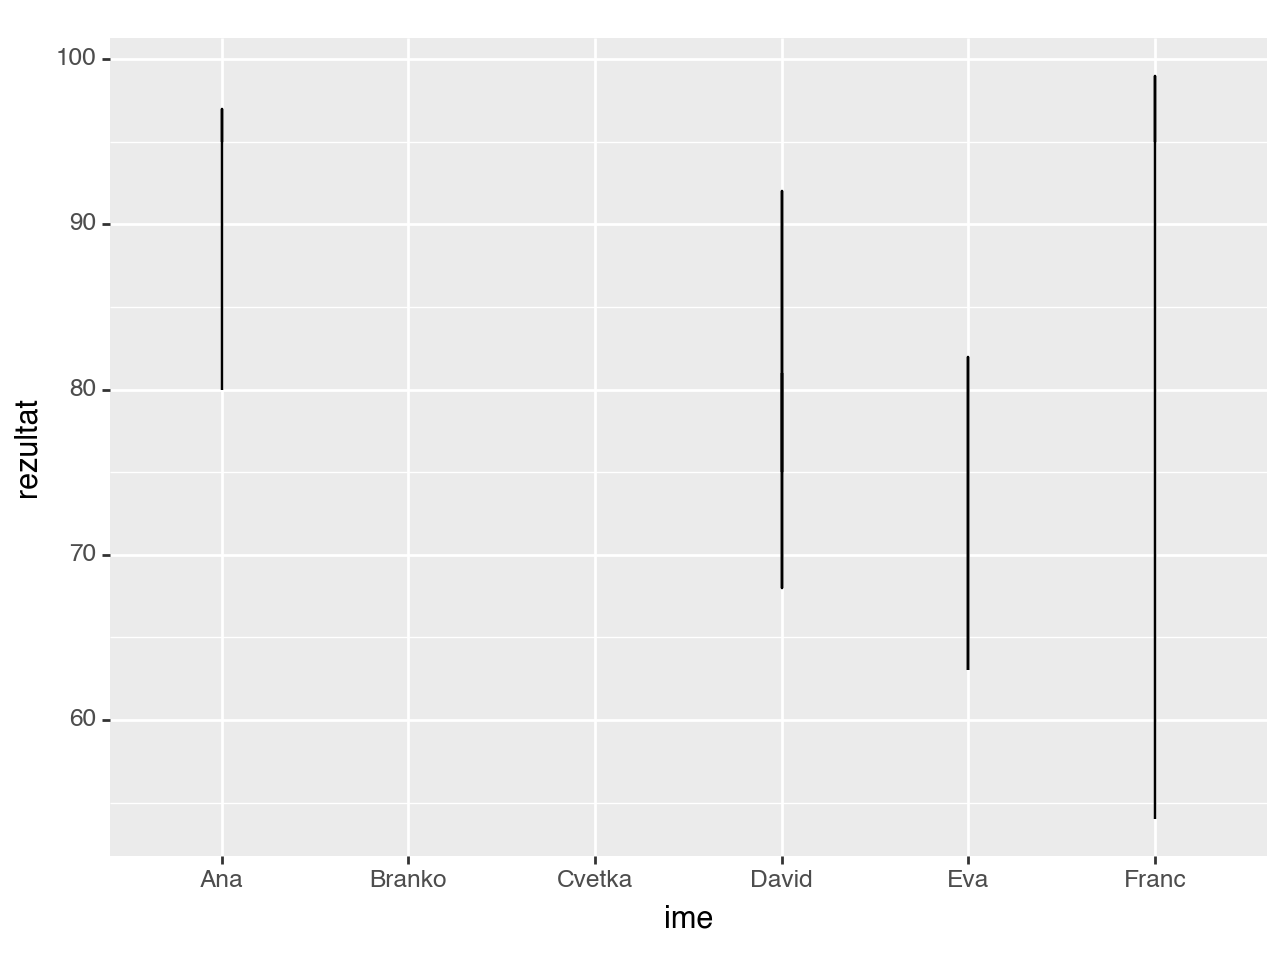

<Figure Size: (640 x 480)>

In [15]:
(
  p9.ggplot(data = studenti_ocene) +
  p9.aes(x = "ime", y = "rezultat") +
  p9.geom_line()
)

Nepričakovan rezultat: črte so namreč vertikalne in povezujejo vrednosti rezultatov za vsakega študenta posebej. Prej bi pričakovali, da bi črte povezovale dosežke različnih študentov pri istem kolokviju. Zato imamo na voljo še eno estetsko lastnost `group`, ki določa skupine podatkov. Če želimo, da se črte nanašajo na posamezne kolokvije, bomo uporabili:

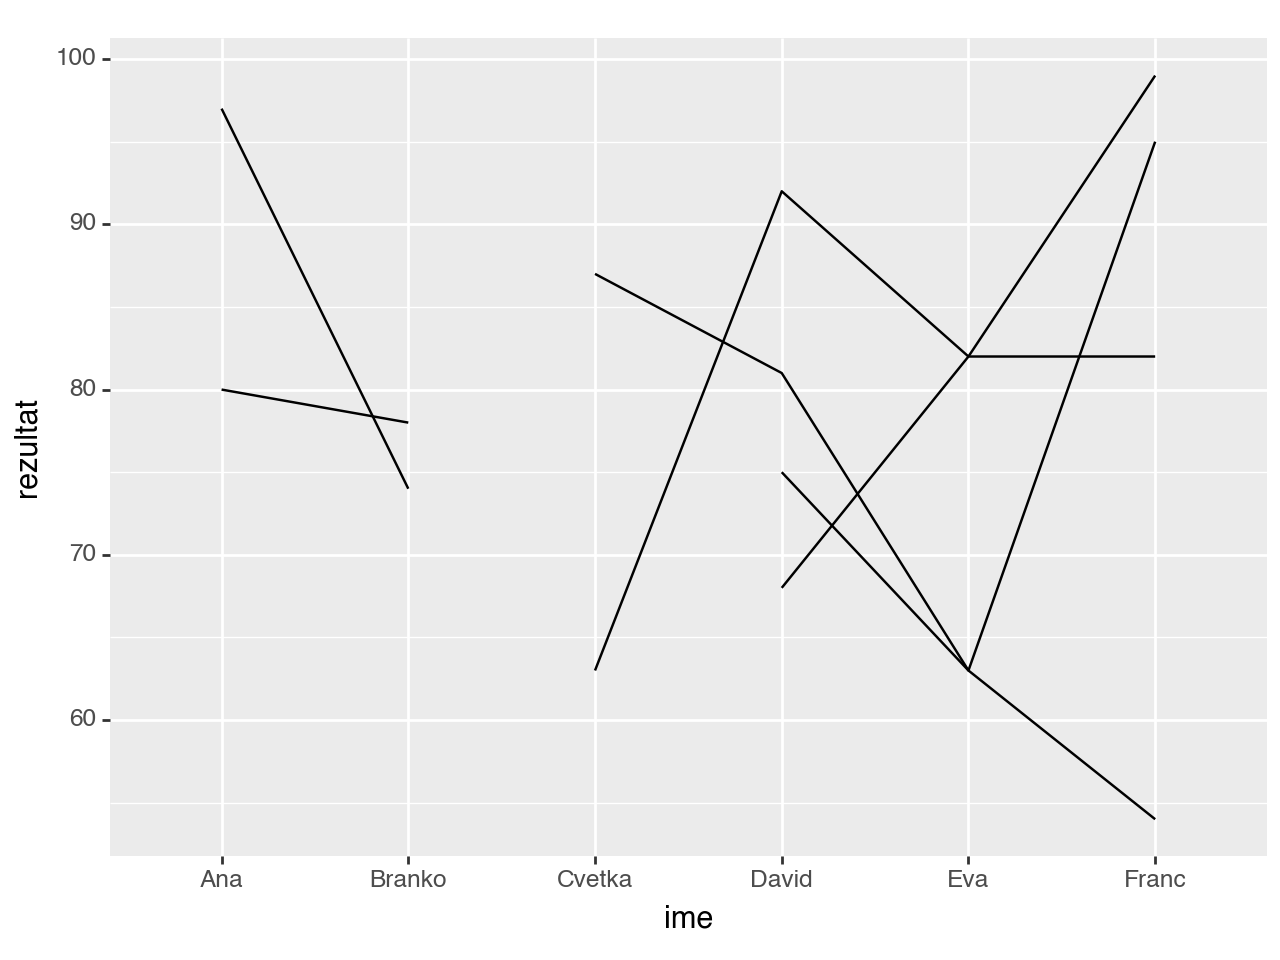

<Figure Size: (640 x 480)>

In [16]:
(
  p9.ggplot(data = studenti_ocene) + 
  p9.aes(
    x = "ime",
    y = "rezultat",
    group = "semester_kolokvij"
  ) +
  p9.geom_line()
)

Zato, da izboljšamo berljivost diagrama (na zgornjem diagramu ne moremo razlikovati kolokvijev, saj so vse črte enake barve), lahko skupine pobarvamo z različnimi barvami, črte odebelimo in črtam dodamo še točke:

/Users/ljupco/predmeti/pandas/venv/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


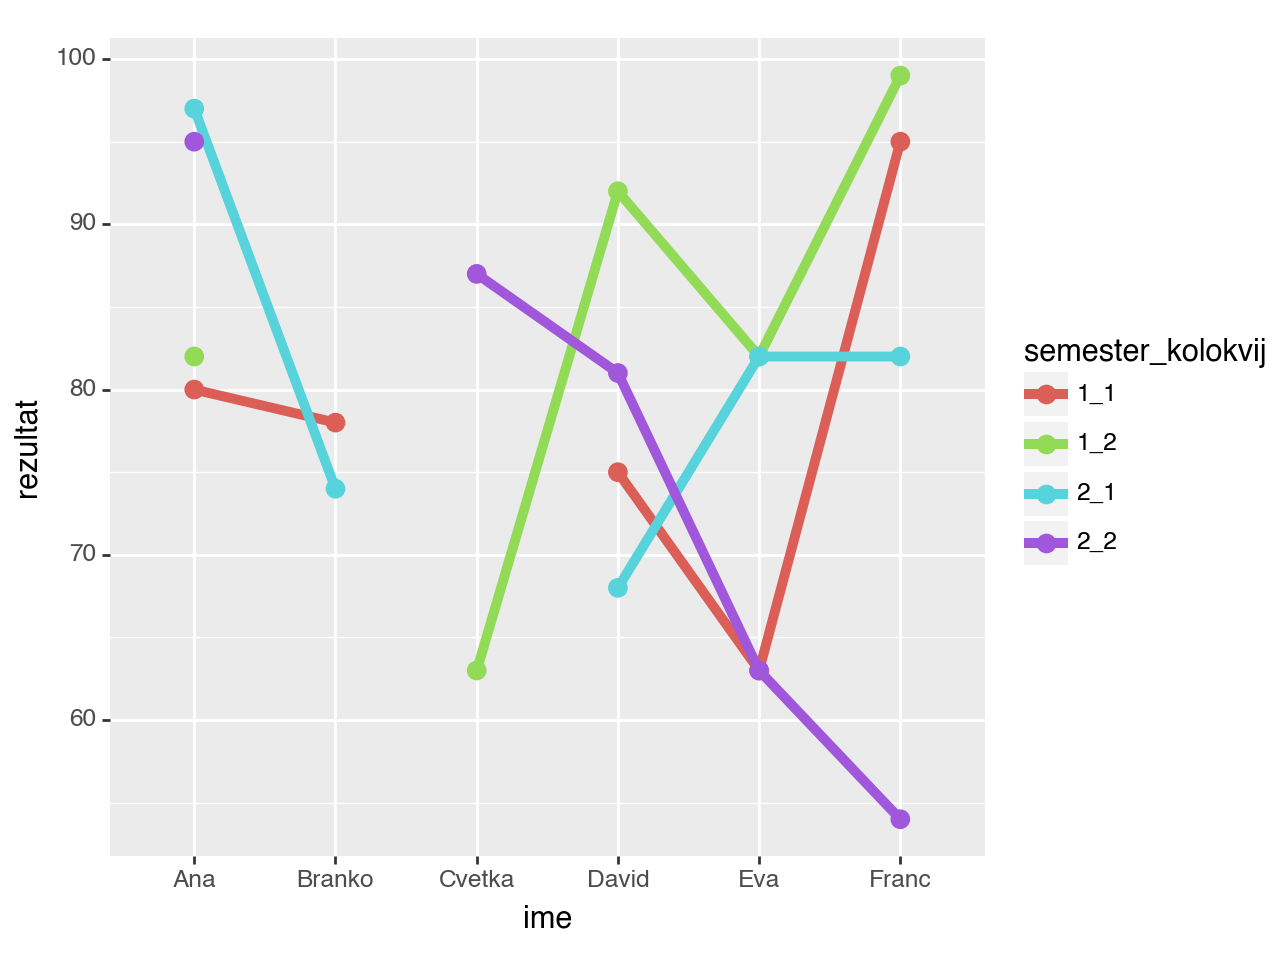

<Figure Size: (640 x 480)>

In [18]:
(
  p9.ggplot(data = studenti_ocene) + 
  p9.aes(
    x = "ime",
    y = "rezultat",
    group = "semester_kolokvij",
    color = "semester_kolokvij"
  ) +
  p9.geom_line(size = 1.5) +
  p9.geom_point(size = 3)
)

Če zaradi tiskanja dokumenta želimo črno-belo različico zgornjega diagrama, lahko barve črt in točk nadomestimo z oblikami `linetype` in `shape`:

/Users/ljupco/predmeti/pandas/venv/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


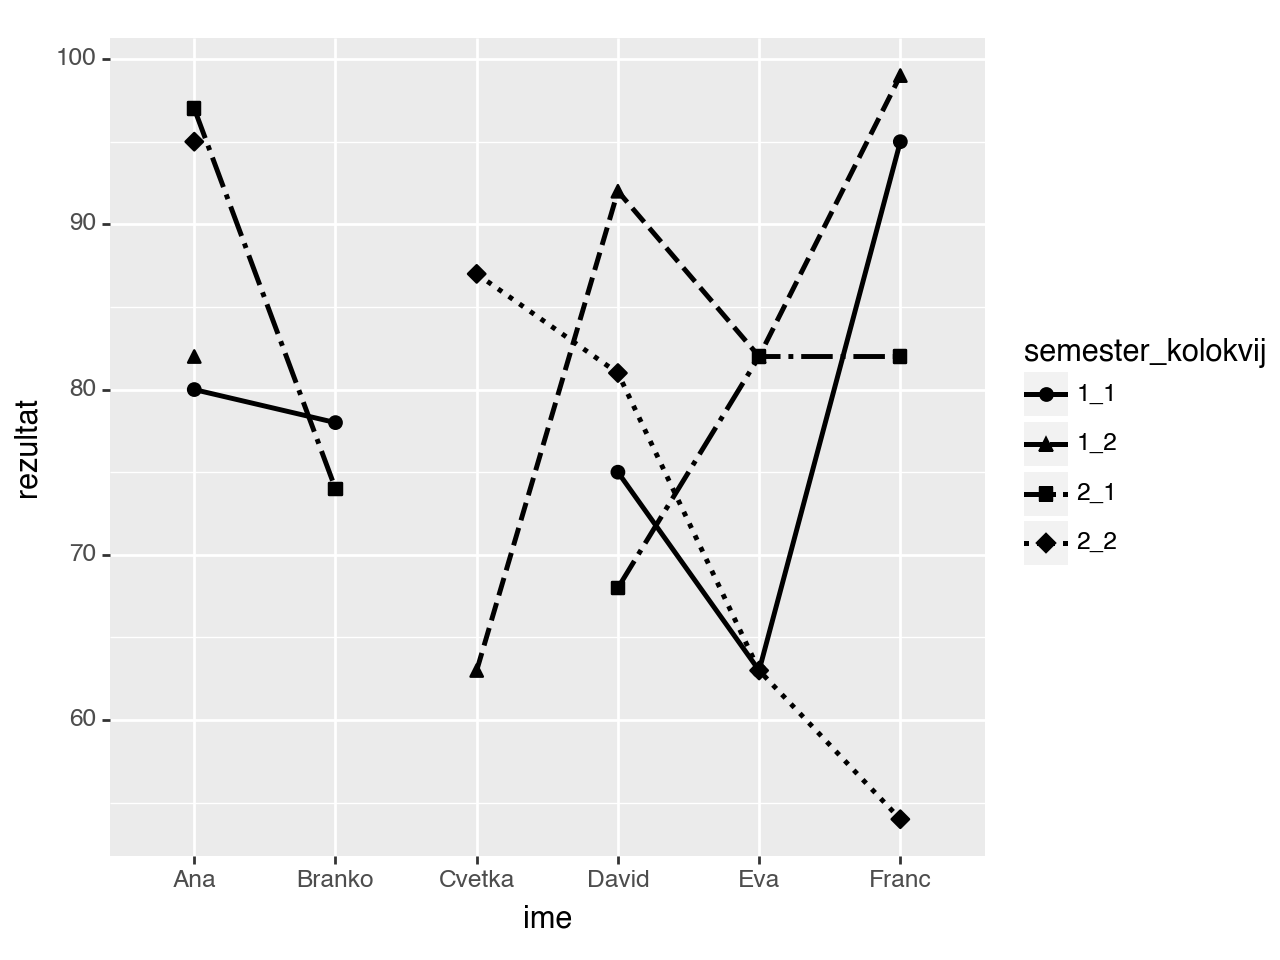

<Figure Size: (640 x 480)>

In [23]:
(
  p9.ggplot(data = studenti_ocene) + 
  p9.aes(
    x = "ime",
    y = "rezultat",
    group = "semester_kolokvij",
    linetype = "semester_kolokvij",
    shape = "semester_kolokvij"
  ) +
  p9.geom_line(size = 1) +
  p9.geom_point(size = 2)
)

### Geometrijski objekt škatla

Poskusimo nazadnje še geometrijski objekt škatla, `boxplot`:

/Users/ljupco/predmeti/pandas/venv/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 4 rows containing non-finite values.


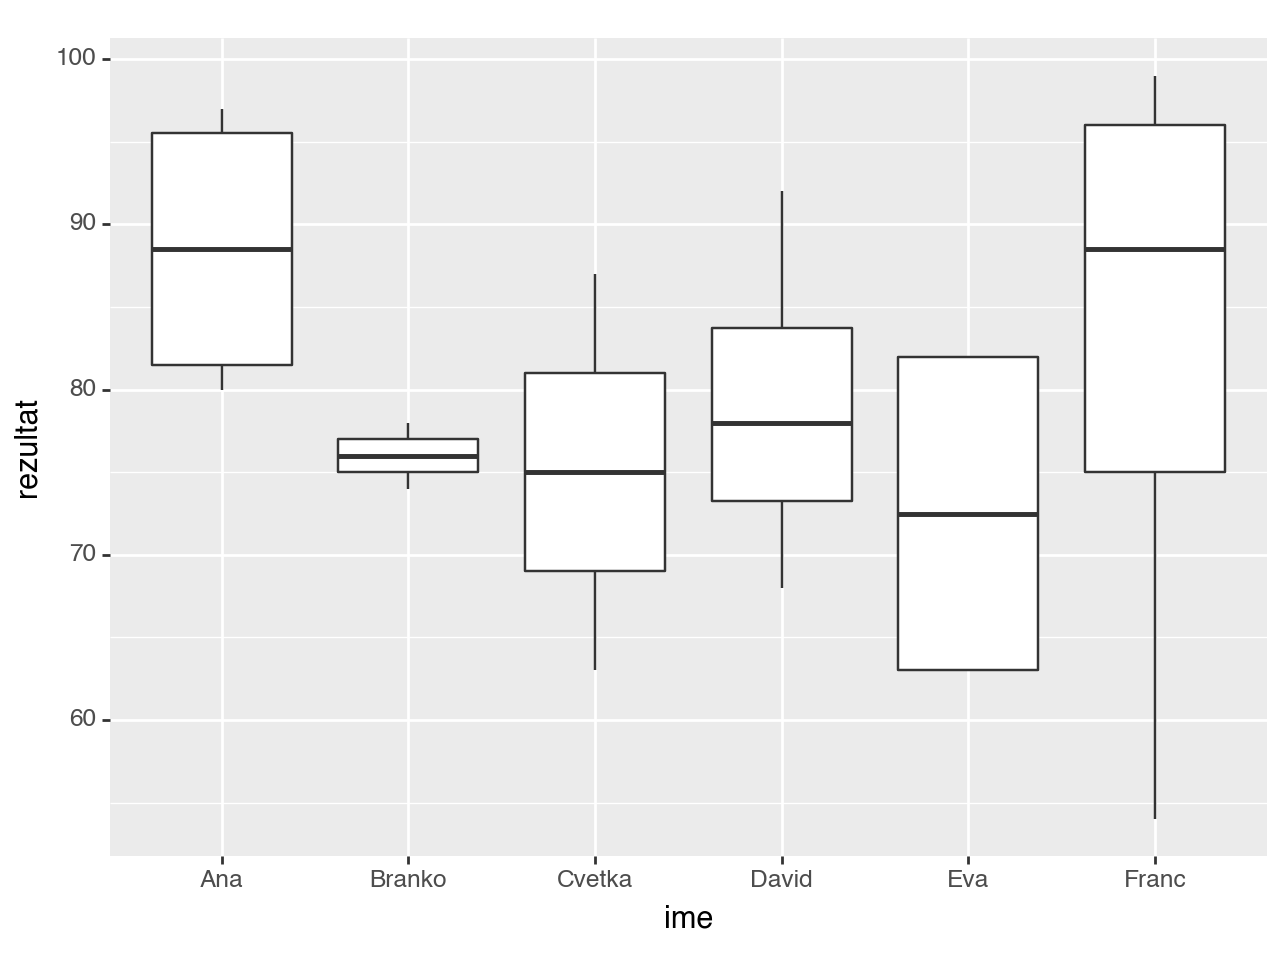

<Figure Size: (640 x 480)>

In [25]:
(
  p9.ggplot(data = studenti_ocene) + 
  p9.aes(
    x = "ime",
    y = "rezultat",
  ) +
  p9.geom_boxplot()
)

Ta diagram nam prikaže porazdelitve rezultatov štirih kolokvijev za vsako študentko (vsakega študenta) posebej. Takemu diagramu rečemo tudi škatla z brki. Zadebeljena črta v sredini škatle ustreza mediani (srednji vrednosti) spremenljivke. Višina škatle ustreza medkvartilnim razmikom: zgornji rob škatle ustreza tretjemu, spodnji rob pa prvemu kvartilu opazovanih vrednosti spremenljivke. Brki (črte) se raztezajo pod in nad škatlo vse do minimalne oziroma maksimalne opazovane vrednosti.

## Plasti (angl. *layers*) statističnega diagrama

## Lestvice, legende, koordinatne osi in koordinatni sistemi

### Funkcije za koordinatne osi in koordinatni sistem

### Funkcije za legende

## Prilagajanje pozicije, angl. *position adjustment*

## Več vidikov, angl. *faceting*

## Naloge

V pripravi.